In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('customer_behavior_data.csv')

# Preview
df.head()

,customer_id,signup_date,last_purchase_date,region,segment,churned,total_spent,purchase_frequency
0,dd8d6013-41ad-4afe-952d-31215bdad7fb,2023-08-03,2025-05-09,South,Silver,0,1607.21,22
1,712976d9-a1ad-4855-accd-db8db21b77c6,2023-11-07,2025-05-09,East,Silver,0,1123.55,25
2,4aceb573-1e24-4d10-b95a-51f83c75adf1,2023-09-07,2025-05-09,North,Silver,0,483.44,25
3,a6641b1d-3488-4d0f-90d6-09816ab957e2,2023-06-15,2025-05-09,East,Gold,0,1278.15,5
4,cdce0d86-05b5-4c5a-89d3-4ba1e716e896,2024-01-17,2025-05-09,East,Silver,0,185.84,16


In [3]:
# Overall churn rate
total_customers = len(df)
churned_customers = df['churned'].sum()
churn_rate = churned_customers / total_customers * 100
print(f"Overall Churn Rate: {churn_rate:.1f}%")

Overall Churn Rate: 30.1%


In [4]:
# Churn by Segment
segment_churn = df.groupby('segment').agg(
    Total_Customers=('customer_id', 'count'),
    Churned_Customers=('churned', 'sum')
).reset_index()
segment_churn['Churn_Rate'] = round(segment_churn['Churned_Customers'] / segment_churn['Total_Customers'] * 100, 1)
print("\nChurn by Segment:\n", segment_churn)


Churn by Segment:
     segment  Total_Customers  Churned_Customers  Churn_Rate
0      Gold             3372               1011        30.0
1  Platinum             3280                984        30.0
2    Silver             3348               1019        30.4


In [5]:
# Churn by Region
region_churn = df.groupby('region').agg(
    Total_Customers=('customer_id', 'count'),
    Churned_Customers=('churned', 'sum')
).reset_index()
region_churn['Churn_Rate'] = round(region_churn['Churned_Customers'] / region_churn['Total_Customers'] * 100, 1)
print("\nChurn by Region:\n", region_churn)


Churn by Region:
   region  Total_Customers  Churned_Customers  Churn_Rate
0   East             2489                740        29.7
1  North             2520                774        30.7
2  South             2437                732        30.0
3   West             2554                768        30.1


In [6]:
# Spending Behavior by Churn Status
spending_by_churn = df.groupby('churned')['total_spent'].mean().reset_index()
spending_by_churn.columns = ['Churned', 'Avg_Total_Spent']
print("\nAverage Spending by Churn Status:\n", spending_by_churn)


Average Spending by Churn Status:
    Churned  Avg_Total_Spent
0        0      1025.348574
1        1      1012.879469


In [7]:
# Spending by Segment and Churn Status
seg_spend = df.groupby(['segment', 'churned'])['total_spent'].mean().reset_index()
seg_spend['Churn_Status'] = seg_spend['churned'].map({0: 'Active', 1: 'Churned'})
seg_spend.drop('churned', axis=1, inplace=True)
seg_spend = seg_spend.pivot(index='segment', columns='Churn_Status', values='total_spent').reset_index()
seg_spend['Spend_Drop_%'] = round((seg_spend['Active'] - seg_spend['Churned']) / seg_spend['Active'] * 100, 1)
print("\nSegment Spending Drop (Churned vs Active):\n", seg_spend)



Segment Spending Drop (Churned vs Active):
 Churn_Status   segment       Active      Churned  Spend_Drop_%
0                 Gold  1018.900940   993.619901           2.5
1             Platinum  1024.705335  1034.001657          -0.9
2               Silver  1032.518922  1011.591138           2.0


In [8]:
# Purchase Frequency by Churn Status
freq_by_churn = df.groupby('churned')['purchase_frequency'].mean().reset_index()
freq_by_churn.columns = ['Churned', 'Avg_Purchase_Frequency']
print("\nPurchase Frequency by Churn Status:\n", freq_by_churn)


Purchase Frequency by Churn Status:
    Churned  Avg_Purchase_Frequency
0        0               14.987690
1        1               14.779031


In [9]:
# Frequency drop by segment
seg_freq = df.groupby(['segment', 'churned'])['purchase_frequency'].mean().reset_index()
seg_freq['Churn_Status'] = seg_freq['churned'].map({0: 'Active', 1: 'Churned'})
seg_freq.drop('churned', axis=1, inplace=True)
seg_freq = seg_freq.pivot(index='segment', columns='Churn_Status', values='purchase_frequency').reset_index()
seg_freq['Freq_Drop_%'] = round((seg_freq['Active'] - seg_freq['Churned']) / seg_freq['Active'] * 100, 1)
print("\nPurchase Frequency Drop by Segment:\n", seg_freq)


Purchase Frequency Drop by Segment:
 Churn_Status   segment     Active    Churned  Freq_Drop_%
0                 Gold  14.880983  14.954500         -0.5
1             Platinum  15.001307  14.558943          2.9
2               Silver  15.082439  14.817468          1.8


In [10]:
# High-Risk Segment Example: North Region Platinum Customers
north_platinum = df[(df['region'] == 'North') & (df['segment'] == 'Platinum')]
north_churn = north_platinum['churned'].mean() * 100
print(f"\nNorth Region Platinum Churn Rate: {north_churn:.1f}%")


North Region Platinum Churn Rate: 32.8%


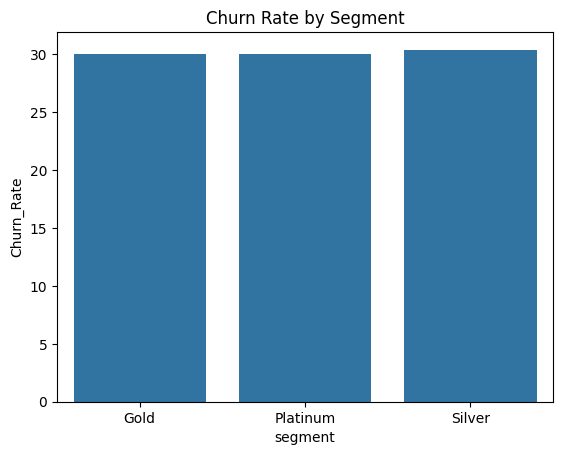

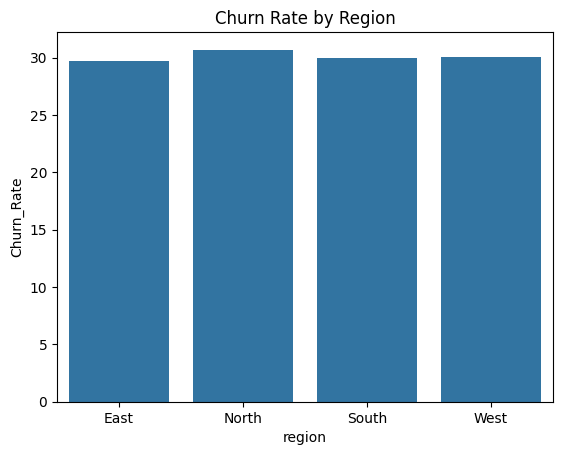

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn rate by segment
sns.barplot(data=segment_churn, x='segment', y='Churn_Rate')
plt.title('Churn Rate by Segment')
plt.show()

# Plot churn rate by region
sns.barplot(data=region_churn, x='region', y='Churn_Rate')
plt.title('Churn Rate by Region')
plt.show()


In [12]:
df.to_csv("customer_behavior_cleaned.csv")